In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
train_df = pd.read_csv('archive/train_energy_data.csv')
test_df = pd.read_csv('archive/test_energy_data.csv')

In [5]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [6]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


## EDA

In [7]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [8]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,924.278723
min,560.000000,1.000000,1.000000,10.050000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,6530.600000


In [9]:
df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

## Categorical Variables

### Visualising
* Building type vs Energy Consumption (mean)
* Day of Week vs Energy Consumption (mean)

c:\Users\rashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


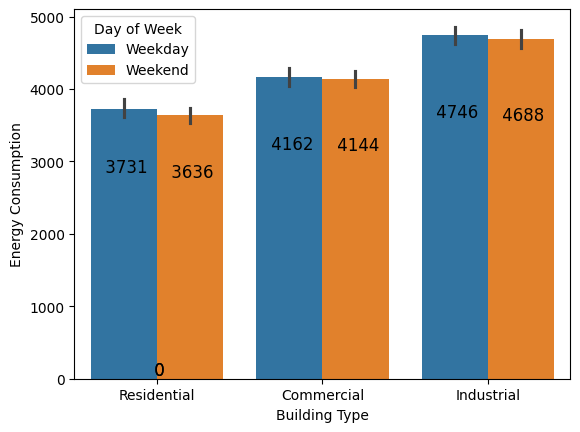

In [10]:
ax = sns.barplot(df, x='Building Type', y='Energy Consumption',hue='Day of Week')

for p in ax.patches:
    ax.annotate(f'{p.get_height(): .0f}', # format
        (p.get_x() + p.get_width() / 2, p.get_height()* 0.75), #position
        ha='center', va = 'bottom', fontsize = 12
    )

* Industrial buildings consume the highest energy during weekdays.
* Energy consumed on weekdays is slightly more than that on weekends.

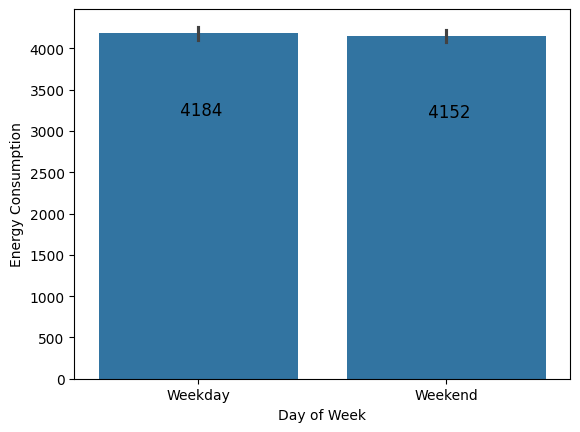

In [11]:
ax = sns.barplot(df, x='Day of Week', y = 'Energy Consumption')

for p in ax.patches:
    ax.annotate(f'{p.get_height() : .0f}',
                (p.get_x() + p.get_width() / 2, p.get_height() * 0.75),
                ha = 'center', va = 'bottom', fontsize = 12
    )

Avg energy consumption is almost same, weekday being slightly larger.

c:\Users\rashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Day of Week', ylabel='Energy Consumption'>

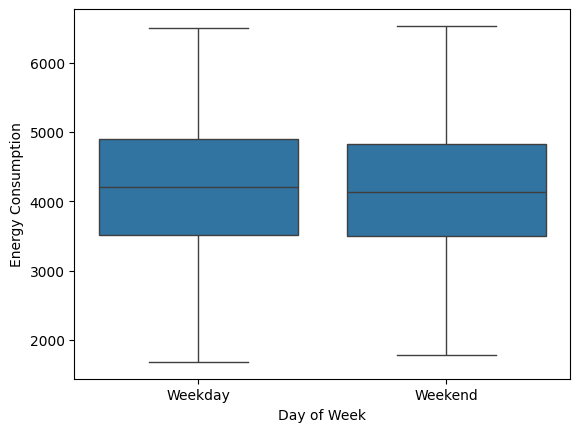

In [12]:
sns.boxplot(df, x='Day of Week', y = 'Energy Consumption')

c:\Users\rashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\rashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rashi\AppData\Local\Programs\Python\Python312

<Axes: xlabel='Building Type', ylabel='Energy Consumption'>

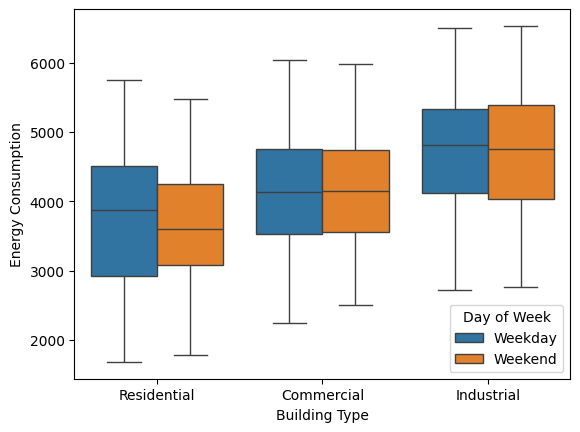

In [13]:
sns.boxplot(df, x='Building Type', y = 'Energy Consumption', hue='Day of Week')

c:\Users\rashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

Text(0.5, 1.0, 'Target Distribution per Category')

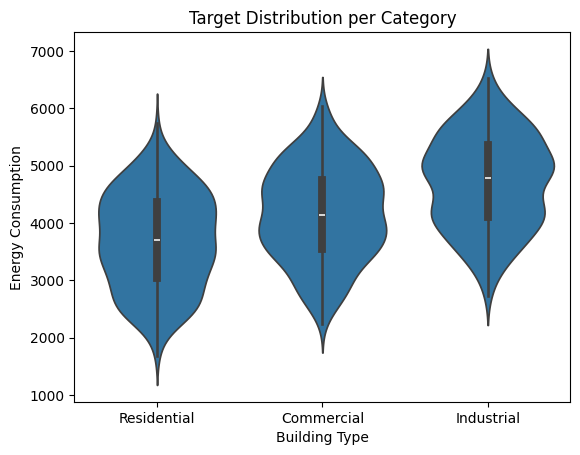

In [14]:
sns.violinplot(data=df, x="Building Type", y="Energy Consumption")
plt.title("Target Distribution per Category")


## Numerical Variables

<Axes: xlabel='Energy Consumption', ylabel='Count'>

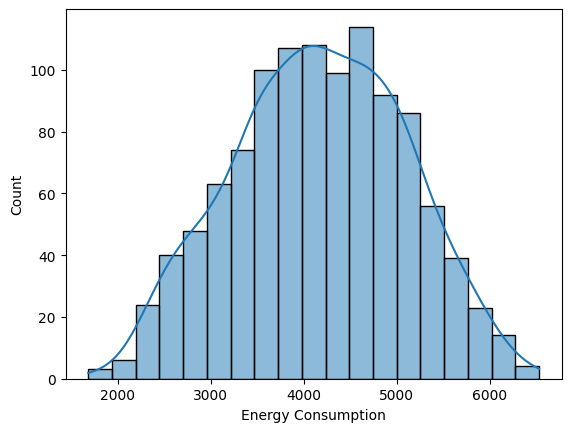

In [15]:
sns.histplot(df['Energy Consumption'],kde=True)

In [16]:
df['Energy Consumption'].kurtosis()

-0.5653160671256954

In [17]:
df['Energy Consumption'].skew()

-0.060156096964443996

* Normally distributed ->  can apply linear regression
* Skewness is very close to 0 -> almost symmetric data. 
* Negative kurtosis -> lighter tails than normal : less extreme outliers

In [18]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


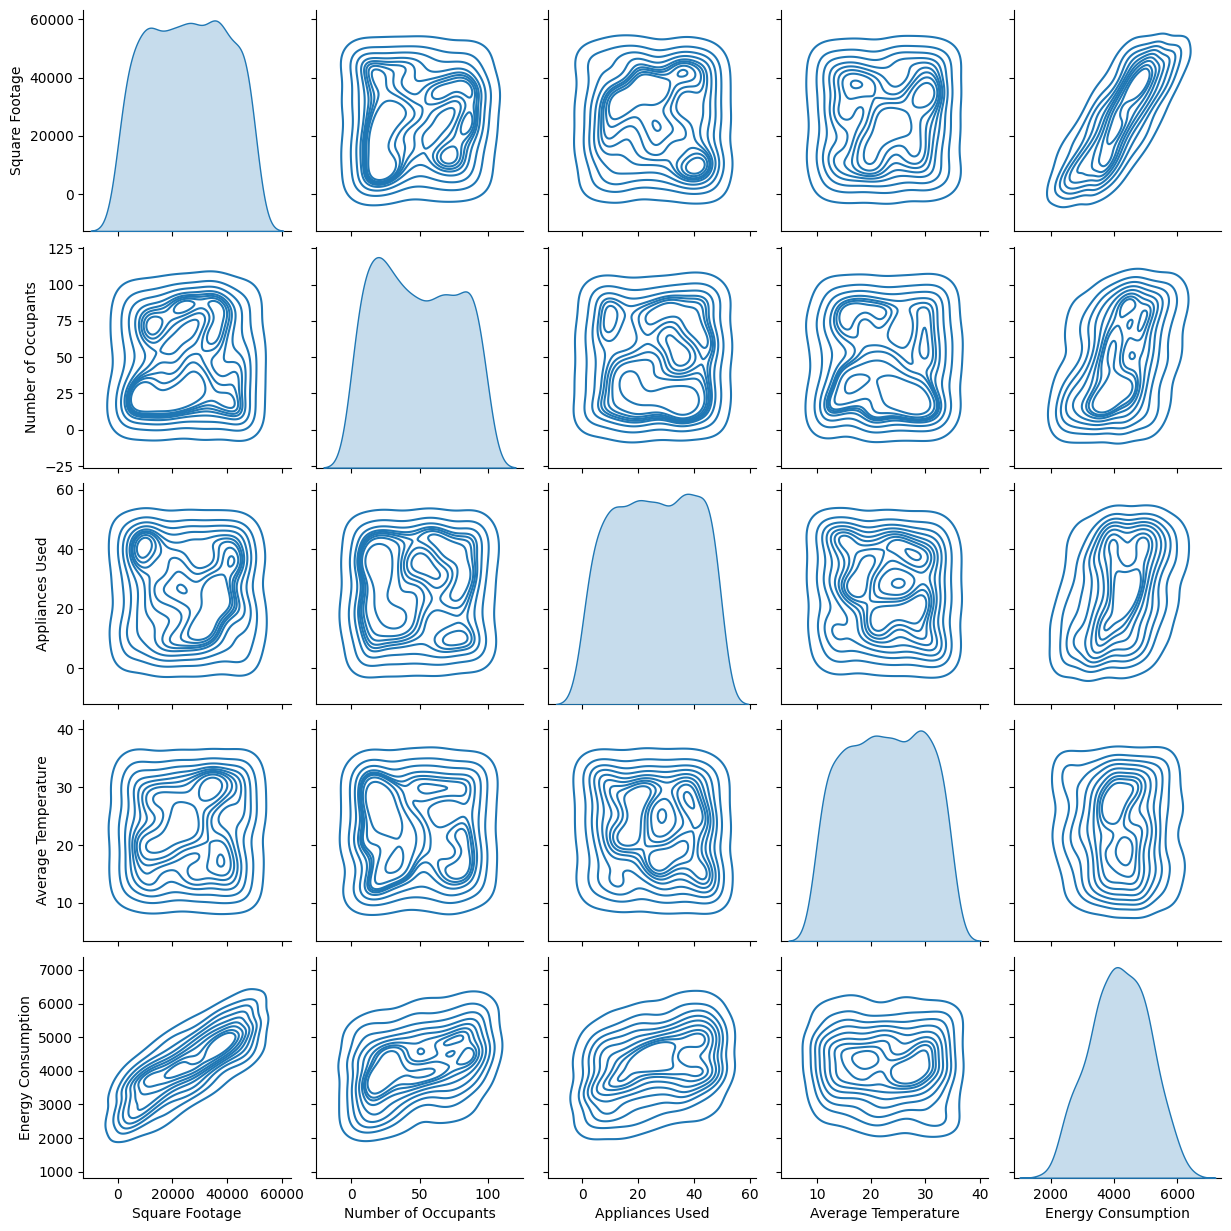

In [19]:
columns = ['Square Footage', 'Number of Occupants','Appliances Used', 'Average Temperature','Energy Consumption']
sns.pairplot(df,kind='kde', vars = columns)

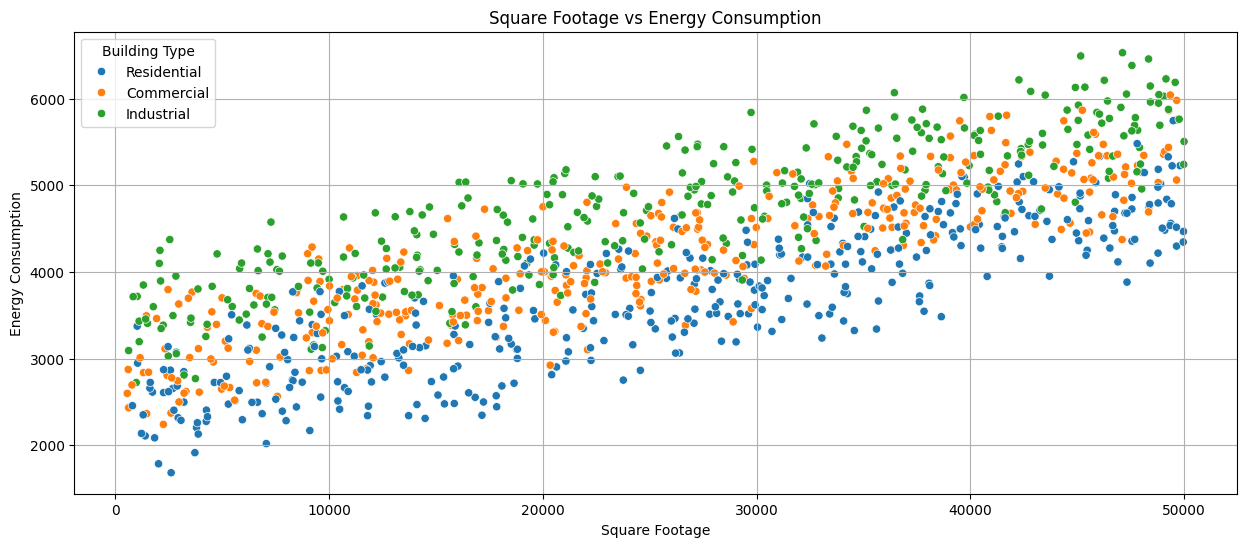

In [20]:
plt.figure(figsize=(15, 6))
plt.grid(True)
plt.title('Square Footage vs Energy Consumption')
sns.scatterplot(df,x='Square Footage', y='Energy Consumption',hue='Building Type')
plt.show()

* All show linearity, energy consumption increases with increase in square footage.
* Industrial buildings consume more energy than residential and industrial.
* Residential is spread from lowest to highest -> there could be other factors that play role in determining energy consumption like Number of Occupants, Average Temperature, Appliances Used

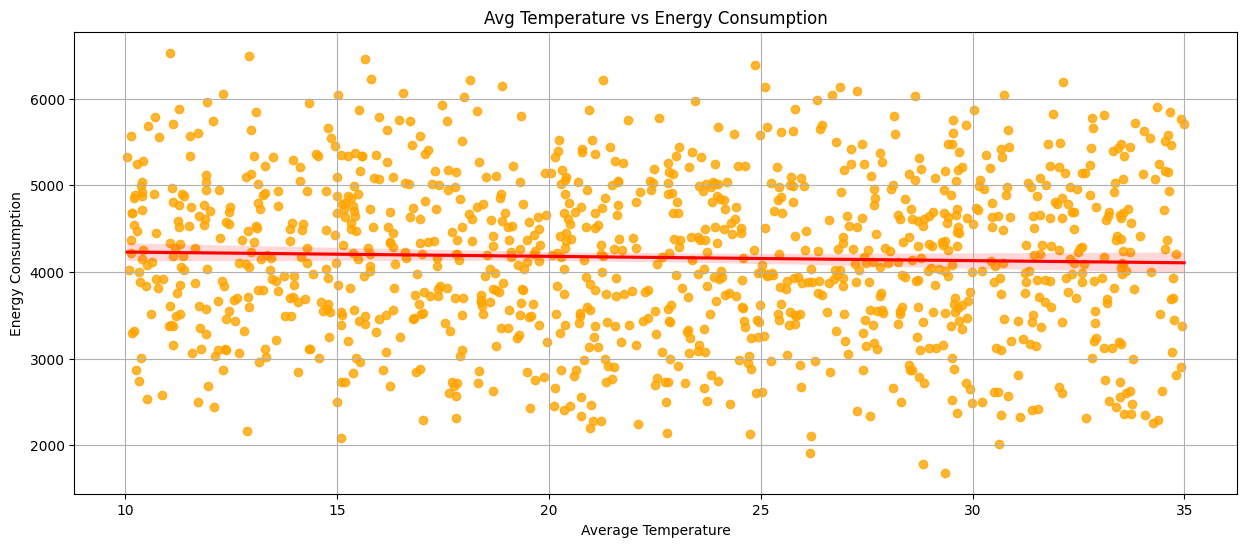

In [21]:
plt.figure(figsize=(15, 6))
plt.grid(True)
plt.title('Avg Temperature vs Energy Consumption')
sns.regplot(df,x='Average Temperature', y='Energy Consumption',color='orange', line_kws={'color':'red'})
plt.show()

* Slight upward trend near lower temperatures (below 15) -> use of heaters and geysers possibly
* Slight downward trend above 25 degress -> AC and coolers

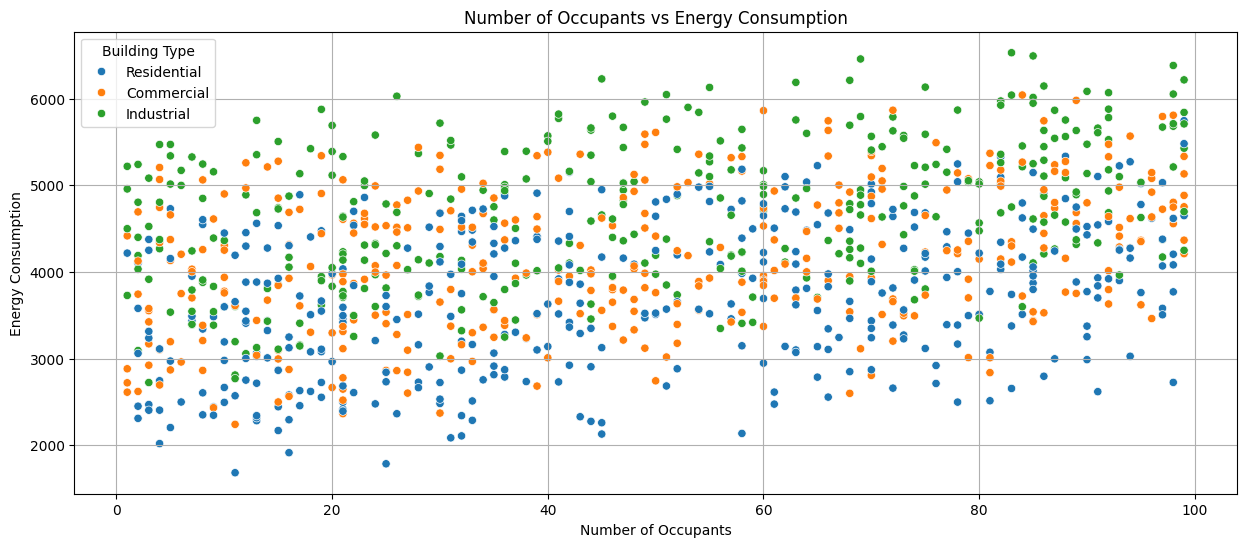

In [22]:
plt.figure(figsize = (15,6))
plt.grid(True)
plt.title('Number of Occupants vs Energy Consumption')
sns.scatterplot(data=df,x='Number of Occupants', y = 'Energy Consumption',hue='Building Type')
plt.show()

* Number of occupants does not have much effect on Energy Consumption - a residential building with close to 100 occupants has energy varying from less than 3000 to more than 5000. Same goes for other types of buildings also

c:\Users\rashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\rashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


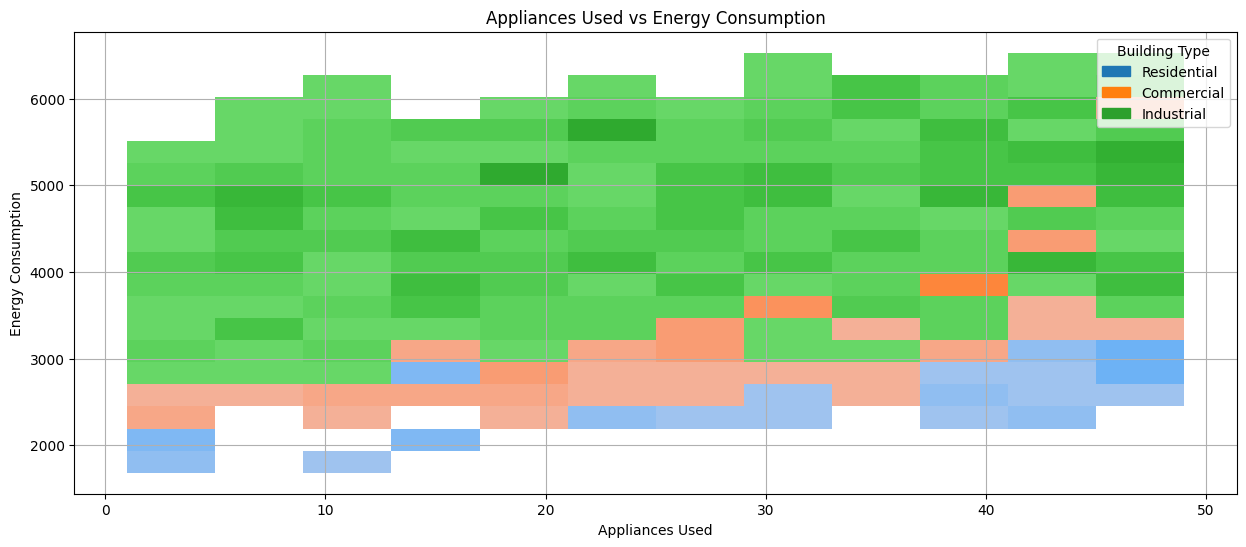

In [23]:
plt.figure(figsize = (15,6))
plt.grid(True)
plt.title('Appliances Used vs Energy Consumption')
sns.histplot(data=df,x='Appliances Used', y = 'Energy Consumption',hue='Building Type')
plt.show()

Appliances used does not have much affect either.

### Converting categorical features to numerical
* Using map for Day of Week
* Using one hot encoding for Building Type

In [24]:
df['Day of Week'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [25]:
df['Building Type'].unique()

array(['Residential', 'Commercial', 'Industrial'], dtype=object)

In [26]:
categories = ['Day of Week', 'Building Type']

In [27]:
day_map = {
    'Weekday' : 0,
    'Weekend' : 1
}
df['Day of Week'] = df['Day of Week'].map(day_map)

In [28]:
df = pd.get_dummies(df,columns=['Building Type'], drop_first=True)

## Model Building

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('Energy Consumption', axis=1)
y = df['Energy Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [33]:
from sklearn.metrics import root_mean_squared_error,r2_score

In [34]:
y_pred = model.predict(X_test)

In [35]:
r2_score(y_test,y_pred)

0.9999999997658856

In [36]:
root_mean_squared_error(y_test,y_pred)

0.014111699497489005

In [37]:
import joblib

In [39]:
joblib.dump(model,filename = 'model.pkl')

['model.pkl']